In [8]:
import catboost
import numpy  as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, GridSearchCV


In [53]:
rec=pd.read_csv('policy_rec.csv')

In [54]:
rec.head()

,Client_Gender_Grp,Client_DOB,Client_Education,Client_Marital_Status_Grp,Client_Occupation_Code,Client_Occupation_Grp,Client_Serving_Branch_Code,Client_SubRegion,Client_Province_Code,Client_Region_Tier,Client_Age_Buy,Client_Ben_Segment_Grp,Client_Monthly_Income,Client_Income_rank,dist_agent_client,Policy_Type,age_cust
0,Male,19760815,Graduate,Married,1489,Engineers,10,CE2,DN,1,41,G6.Others,From 15mil to below 30mil,5,0.000000,RO,42
1,Female,19881024,High School,Married,2019,"Sales (Insurance, Real estate)",10,CE2,DN,1,29,G6.Others,From 15mil to below 30mil,5,0.000000,CM,30
2,Female,19870917,Graduate,Married,2019,"Sales (Insurance, Real estate)",10,CE2,DN,1,30,G6.Others,From 30mil to below 45mil,6,0.000000,RO,31
3,Female,19890202,Graduate,Married,218,White-collar,10,MK2,71,1,29,G3.Couple with smaller kids,From 150mil and above,9,0.000000,RO,30
4,Female,19821125,Other,Married,2025,Wetmarket/Hawker vendor,10,NO4,ND,2,36,G5.Loving spouse,From 15mil to below 30mil,5,991.239485,CM,36


In [55]:
#### get index of 
rec.columns

Index(['Client_Gender_Grp', 'Client_DOB', 'Client_Education',
       'Client_Marital_Status_Grp', 'Client_Occupation_Code',
       'Client_Occupation_Grp', 'Client_Serving_Branch_Code',
       'Client_SubRegion', 'Client_Province_Code', 'Client_Region_Tier',
       'Client_Age_Buy', 'Client_Ben_Segment_Grp', 'Client_Monthly_Income',
       'Client_Income_rank', 'dist_agent_client', 'Policy_Type', 'age_cust'],
      dtype='object')

In [56]:
colx=['Client_Gender_Grp', 'Client_Education',
       'Client_Marital_Status_Grp', 'Client_Occupation_Code',
       'Client_Occupation_Grp', 'Client_Serving_Branch_Code',
       'Client_SubRegion', 'Client_Province_Code', 'Client_Region_Tier',
       'Client_Age_Buy', 'Client_Ben_Segment_Grp', 'Client_Monthly_Income',
       'Client_Income_rank', 'dist_agent_client', 'age_cust']


In [57]:
rec.Policy_Type.unique()

array(['RO', 'CM', 'UR', 'EU', 'VL', 'TA3', 'EA'], dtype=object)

In [71]:
#### remove TA3
rec=rec[rec.Policy_Type.isin([ 'CM', 'UR', 'EU', 'VL'])]
train, validate, test = np.split(rec.sample(frac=1), [int(.6*len(rec)), int(.8*len(rec))])

In [72]:
#### group together 

def group_policy(x):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-72-d93504e20e49>, line 4)

In [73]:
x_train, x_test, y_train, y_test = train_test_split(train[colx],train[['Policy_Type']], test_size=0.30)

In [74]:
categorical_features_indices=np.where(x_train.dtypes==object)[0]

In [75]:
from catboost import Pool


In [76]:
train_label=y_train
eval_label=y_test

In [77]:
train_dataset = Pool(data=x_train,
                     label=train_label,
                     cat_features=categorical_features_indices)

eval_dataset = Pool(data=x_test,
                    label=eval_label,
                    cat_features=categorical_features_indices)


In [113]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=500,
                           learning_rate=0.1,
                           depth=3,
                           loss_function='MultiClass')
# Fit model
model.fit(train_dataset)


0:	learn: -1.3301983	total: 99.8ms	remaining: 49.8s
1:	learn: -1.2869477	total: 178ms	remaining: 44.4s
2:	learn: -1.2530103	total: 278ms	remaining: 46s
3:	learn: -1.2238602	total: 363ms	remaining: 45.1s
4:	learn: -1.2007832	total: 471ms	remaining: 46.6s
5:	learn: -1.1798956	total: 551ms	remaining: 45.4s
6:	learn: -1.1624582	total: 643ms	remaining: 45.3s
7:	learn: -1.1485371	total: 715ms	remaining: 44s
8:	learn: -1.1360223	total: 807ms	remaining: 44s
9:	learn: -1.1253452	total: 911ms	remaining: 44.6s
10:	learn: -1.1155261	total: 996ms	remaining: 44.3s
11:	learn: -1.1083473	total: 1.08s	remaining: 44.1s
12:	learn: -1.1009534	total: 1.19s	remaining: 44.5s
13:	learn: -1.0948358	total: 1.3s	remaining: 45.1s
14:	learn: -1.0899928	total: 1.38s	remaining: 44.6s
15:	learn: -1.0854780	total: 1.47s	remaining: 44.6s
16:	learn: -1.0822462	total: 1.55s	remaining: 44s
17:	learn: -1.0781683	total: 1.66s	remaining: 44.5s
18:	learn: -1.0748612	total: 1.73s	remaining: 43.8s
19:	learn: -1.0711795	total: 1

159:	learn: -1.0142100	total: 14.2s	remaining: 30.2s
160:	learn: -1.0139697	total: 14.3s	remaining: 30.1s
161:	learn: -1.0139206	total: 14.4s	remaining: 30s
162:	learn: -1.0138206	total: 14.5s	remaining: 29.9s
163:	learn: -1.0137442	total: 14.5s	remaining: 29.8s
164:	learn: -1.0137086	total: 14.6s	remaining: 29.7s
165:	learn: -1.0136882	total: 14.7s	remaining: 29.6s
166:	learn: -1.0134924	total: 14.8s	remaining: 29.6s
167:	learn: -1.0133569	total: 14.9s	remaining: 29.5s
168:	learn: -1.0132603	total: 15s	remaining: 29.4s
169:	learn: -1.0131586	total: 15.1s	remaining: 29.3s
170:	learn: -1.0130656	total: 15.2s	remaining: 29.2s
171:	learn: -1.0130404	total: 15.3s	remaining: 29.1s
172:	learn: -1.0129654	total: 15.4s	remaining: 29s
173:	learn: -1.0129326	total: 15.4s	remaining: 28.9s
174:	learn: -1.0128384	total: 15.5s	remaining: 28.9s
175:	learn: -1.0126897	total: 15.6s	remaining: 28.8s
176:	learn: -1.0123709	total: 15.7s	remaining: 28.7s
177:	learn: -1.0123048	total: 15.8s	remaining: 28.6s

315:	learn: -1.0009063	total: 28.1s	remaining: 16.4s
316:	learn: -1.0008916	total: 28.2s	remaining: 16.3s
317:	learn: -1.0008062	total: 28.3s	remaining: 16.2s
318:	learn: -1.0006822	total: 28.4s	remaining: 16.1s
319:	learn: -1.0005393	total: 28.5s	remaining: 16s
320:	learn: -1.0005150	total: 28.6s	remaining: 15.9s
321:	learn: -1.0004509	total: 28.7s	remaining: 15.9s
322:	learn: -1.0004228	total: 28.8s	remaining: 15.8s
323:	learn: -1.0004123	total: 28.9s	remaining: 15.7s
324:	learn: -1.0003466	total: 29s	remaining: 15.6s
325:	learn: -1.0002780	total: 29.1s	remaining: 15.5s
326:	learn: -1.0002477	total: 29.1s	remaining: 15.4s
327:	learn: -1.0001989	total: 29.2s	remaining: 15.3s
328:	learn: -1.0001333	total: 29.3s	remaining: 15.2s
329:	learn: -1.0001013	total: 29.4s	remaining: 15.2s
330:	learn: -1.0000595	total: 29.5s	remaining: 15.1s
331:	learn: -1.0000193	total: 29.6s	remaining: 15s
332:	learn: -0.9999923	total: 29.7s	remaining: 14.9s
333:	learn: -0.9999630	total: 29.8s	remaining: 14.8s

472:	learn: -0.9936818	total: 42.3s	remaining: 2.41s
473:	learn: -0.9936469	total: 42.4s	remaining: 2.33s
474:	learn: -0.9934860	total: 42.5s	remaining: 2.23s
475:	learn: -0.9934391	total: 42.6s	remaining: 2.15s
476:	learn: -0.9933621	total: 42.6s	remaining: 2.06s
477:	learn: -0.9933358	total: 42.8s	remaining: 1.97s
478:	learn: -0.9932970	total: 42.8s	remaining: 1.88s
479:	learn: -0.9932776	total: 42.9s	remaining: 1.79s
480:	learn: -0.9932692	total: 43s	remaining: 1.7s
481:	learn: -0.9932572	total: 43.1s	remaining: 1.61s
482:	learn: -0.9932239	total: 43.2s	remaining: 1.52s
483:	learn: -0.9931804	total: 43.3s	remaining: 1.43s
484:	learn: -0.9931541	total: 43.4s	remaining: 1.34s
485:	learn: -0.9931273	total: 43.4s	remaining: 1.25s
486:	learn: -0.9930319	total: 43.5s	remaining: 1.16s
487:	learn: -0.9929916	total: 43.6s	remaining: 1.07s
488:	learn: -0.9929008	total: 43.7s	remaining: 983ms
489:	learn: -0.9928535	total: 43.8s	remaining: 894ms
490:	learn: -0.9927605	total: 43.9s	remaining: 80

In [102]:
# model=CatBoostClassifier(loss_function='MultiClass',iterations=50, depth=3, learning_rate=0.1)

In [107]:
preds_class = model.predict(eval_dataset)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(eval_dataset)
# Get predicted RawFormulaVal
preds_raw = model.predict(eval_dataset, 
                          prediction_type='RawFormulaVal')

In [108]:
from sklearn.metrics import accuracy_score

In [109]:
# model.fit(x_train,y_train,cat_features=categorical_features_indices,eval_set=(x_test,y_test),plot=True)

In [110]:
validx=validate[colx]
validy=validate['Policy_Type']

In [111]:
pred=model.predict_proba(validx)[:,1]
predn=model.predict(validx)

In [112]:
accuracy_score(predn,validy)

0.5593805392294058

In [95]:
from sklearn.metrics import roc_auc_score

In [114]:
import matplotlib.pyplot as plt

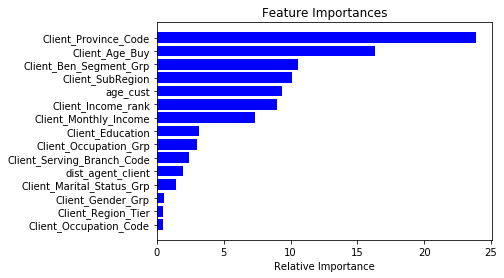

In [115]:
features = x_test.columns
importances = model.feature_importances_
indices = np.argsort(importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()